# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [26]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\UNIVE\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [27]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [28]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [29]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(q="bitcoin AND 2022", language="en")
btc_headlines["articles"][0]

{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Mariella Moon',
 'title': 'Chipotle now accepts cryptocurrency payments',
 'description': "You can now reportedly pay for your burritos and tacos with Bitcoin and other digital currencies, in case you don't mind spending your coins directly instead of going through exchanges first. Flexa has announced that the Mexican fast food chain can now accept…",
 'url': 'https://www.engadget.com/chipotle-accepts-cryptocurrency-payments-123013632.html',
 'urlToImage': 'https://s.yimg.com/os/creatr-images/2019-11/62e01e20-0493-11ea-bffd-0d62f5b23b7c',
 'publishedAt': '2022-06-02T12:30:13Z',
 'content': "You can now reportedly pay for your burritos and tacos with Bitcoin and other digital currencies, in case you don't mind spending your coins directly instead of going through exchanges first. Flexa h… [+1428 chars]"}

In [30]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q="ethereum AND 2022", language="en")
eth_headlines["articles"][0]

{'source': {'id': None, 'name': 'Entrepreneur'},
 'author': 'John Monarch',
 'title': 'Can Blockchain Help Fix Broken Supply Chains in 2022?',
 'description': 'Blockchain in Supply Chain was a hot topic - then fell very quiet. Where is it today?',
 'url': 'https://www.entrepreneur.com/article/426351',
 'urlToImage': 'https://assets.entrepreneur.com/content/3x2/2000/1653325433-GettyImages-1194691729.jpg',
 'publishedAt': '2022-06-03T14:00:00Z',
 'content': 'We first heard about the potential of blockchain in supply chains several years ago, and almost immediately were thrust into a cycle of hype and hope of what they could do for us, followed by a "trou… [+4785 chars]'}

In [31]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2022-06-02,You can now reportedly pay for your burritos a...,-0.1027,0.000,0.040,0.960
1,2022-05-09,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928
2,2022-05-05,"May 5 (Reuters) - Block Inc (SQ.N), the paymen...",-0.6908,0.000,0.183,0.817
3,2022-05-24,May 24 (Reuters) - The crypto winter is into i...,0.1326,0.044,0.000,0.956
4,2022-05-13,El Salvador which became the first country to ...,-0.2023,0.042,0.064,0.894


In [32]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2022-06-03,We first heard about the potential of blockcha...,0.4404,0.075,0.000,0.925
1,2022-05-09,Editorial IndependenceWe want to help you make...,0.6908,0.178,0.000,0.822
2,2022-05-09,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928
3,2022-05-25,Did you miss a session from GamesBeat Summit 2...,-0.1531,0.000,0.048,0.952
4,2022-05-12,"Once pegged to the dollar, Terras UST coin is ...",-0.3612,0.000,0.065,0.935


In [33]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.00000
mean,-0.069445,0.054450,0.058600,0.88700
std,0.453139,0.056072,0.066176,0.07131
min,-0.690800,0.000000,0.000000,0.73900
25%,-0.439600,0.000000,0.000000,0.82925
50%,-0.140300,0.046000,0.047000,0.90250
75%,0.218425,0.072500,0.098000,0.94525
max,0.690800,0.178000,0.187000,1.00000


In [34]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.00000
mean,0.060825,0.062850,0.050750,0.88650
std,0.422155,0.051195,0.062608,0.07251
min,-0.790600,0.000000,0.000000,0.71100
25%,-0.205125,0.033750,0.000000,0.84925
50%,0.076900,0.067000,0.043500,0.90300
75%,0.421500,0.080750,0.067500,0.93875
max,0.690800,0.178000,0.234000,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: It appears that it was Ethereum

Q: Which coin had the highest compound score?

A: It appears neither. 

Q. Which coin had the highest positive score?

A: It appears that neither. 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [35]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [36]:
# Instantiate the lemmatizer
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addon = {'said', 'has', 'feb', 'way'}


In [37]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
  
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [38]:
# Create a new tokens column for Bitcoin
btc_df['Token'] = btc_df['text'].apply(tokenizer)
btc_df.head()

,date,text,compound,positive,negative,neutral,Token
0,2022-06-02,You can now reportedly pay for your burritos a...,-0.1027,0.000,0.040,0.960,"[reportedly, pay, burrito, taco, bitcoin, digi..."
1,2022-05-09,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928,"[image, source, getty, imagesthe, value, bitco..."
2,2022-05-05,"May 5 (Reuters) - Block Inc (SQ.N), the paymen...",-0.6908,0.000,0.183,0.817,"[may, reuters, block, inc, sqn, payment, compa..."
3,2022-05-24,May 24 (Reuters) - The crypto winter is into i...,0.1326,0.044,0.000,0.956,"[may, reuters, crypto, winter, ninth, week, bi..."
4,2022-05-13,El Salvador which became the first country to ...,-0.2023,0.042,0.064,0.894,"[el, salvador, became, first, country, make, b..."


In [39]:
# Create a new tokens column for Ethereum
eth_df['Token'] = eth_df['text'].apply(tokenizer)
eth_df.head()

,date,text,compound,positive,negative,neutral,Token
0,2022-06-03,We first heard about the potential of blockcha...,0.4404,0.075,0.000,0.925,"[first, heard, potential, blockchain, supply, ..."
1,2022-05-09,Editorial IndependenceWe want to help you make...,0.6908,0.178,0.000,0.822,"[editorial, independencewe, want, help, make, ..."
2,2022-05-09,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928,"[image, source, getty, imagesthe, value, bitco..."
3,2022-05-25,Did you miss a session from GamesBeat Summit 2...,-0.1531,0.000,0.048,0.952,"[miss, session, gamesbeat, summit, session, av..."
4,2022-05-12,"Once pegged to the dollar, Terras UST coin is ...",-0.3612,0.000,0.065,0.935,"[pegged, dollar, terras, ust, coin, trading, c..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [72]:
from collections import Counter
from nltk import ngrams

In [73]:
# Generate the Bitcoin N-grams where N=2
btc_ngram_counts = ngrams(tokenizer(btc_df['text'].str.cat()), 2)
Counter(btc_ngram_counts).most_common(30)  

[(('charsmay', 'reuters'), 4),
 (('world', 'largest'), 2),
 (('cryptocurrency', 'bitcoin'), 2),
 (('may', 'reuters'), 2),
 (('new', 'bitcoin'), 2),
 (('bitcoin', 'mining'), 2),
 (('mining', 'chip'), 2),
 (('crypto', 'market'), 2),
 (('crypto', 'asset'), 2),
 (('reportedly', 'pay'), 1),
 (('pay', 'burrito'), 1),
 (('burrito', 'taco'), 1),
 (('taco', 'bitcoin'), 1),
 (('bitcoin', 'digital'), 1),
 (('digital', 'currency'), 1),
 (('currency', 'case'), 1),
 (('case', 'dont'), 1),
 (('dont', 'mind'), 1),
 (('mind', 'spending'), 1),
 (('spending', 'coin'), 1),
 (('coin', 'directly'), 1),
 (('directly', 'instead'), 1),
 (('instead', 'going'), 1),
 (('going', 'exchange'), 1),
 (('exchange', 'first'), 1),
 (('first', 'flexa'), 1),
 (('flexa', 'h'), 1),
 (('h', 'charsimage'), 1),
 (('charsimage', 'source'), 1),
 (('source', 'getty'), 1)]

In [74]:
# Generate the Ethereum N-grams where N=2
eth_ngram_counts = ngrams(tokenizer(eth_df['text'].str.cat()), 2)
Counter(eth_ngram_counts).most_common(30)

[(('charsdid', 'miss'), 3),
 (('miss', 'session'), 3),
 (('session', 'gamesbeat'), 3),
 (('gamesbeat', 'summit'), 3),
 (('summit', 'session'), 3),
 (('session', 'available'), 3),
 (('available', 'stream'), 3),
 (('value', 'bitcoin'), 2),
 (('blockchain', 'game'), 2),
 (('charsthe', 'cryptocurrency'), 2),
 (('stream', 'learn'), 2),
 (('first', 'heard'), 1),
 (('heard', 'potential'), 1),
 (('potential', 'blockchain'), 1),
 (('blockchain', 'supply'), 1),
 (('supply', 'chain'), 1),
 (('chain', 'several'), 1),
 (('several', 'year'), 1),
 (('year', 'ago'), 1),
 (('ago', 'almost'), 1),
 (('almost', 'immediately'), 1),
 (('immediately', 'thrust'), 1),
 (('thrust', 'cycle'), 1),
 (('cycle', 'hype'), 1),
 (('hype', 'hope'), 1),
 (('hope', 'could'), 1),
 (('could', 'u'), 1),
 (('u', 'followed'), 1),
 (('followed', 'trou'), 1),
 (('trou', 'charseditorial'), 1)]

In [112]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(10)

In [159]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_ngram_counts)

[]

In [158]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_ngram_counts)

[]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [146]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [10.0, 5.0]

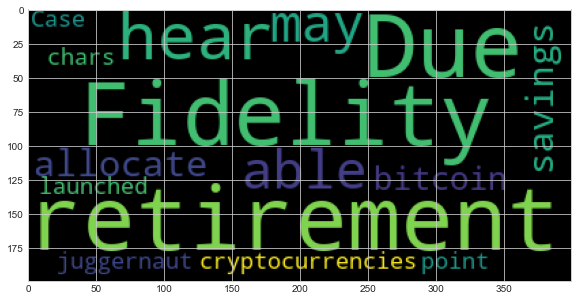

In [147]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(text)
plt.imshow(btc_wc)

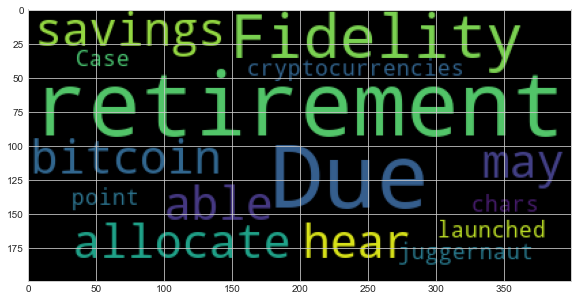

In [148]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(text)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [88]:
import spacy
from spacy import displacy

In [89]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [90]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [91]:
# Concatenate all of the Bitcoin text together
concat_btc = btc_df['text'].str.cat()

In [141]:
# Run the NER processor on all of the text
btc_doc = nlp(concat_btc)

# Add a title to the document
btc_doc.user_data['title'] = "This is a title"

In [142]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [94]:
# List all Entities
print([ent.text for ent in btc_doc.ents if ent.label_ == 'ORG'])

['Getty Images', 'Reuters', 'Reuters', 'Reuters', 'Reuters', 'Fed', 'the Financial Times', 'Intel', 'REUTERS', 'Fidelity', 'Fidelity', 'Reuters']


---

### Ethereum NER

In [95]:
# Concatenate all of the Ethereum text together
concat_eth = eth_df['text'].str.cat()

In [96]:
# Run the NER processor on all of the text
eth_doc = nlp(concat_eth)

# Add a title to the document
# YOUR CODE HERE!

In [97]:
# Render the visualization
displacy.render(eth_doc, style='ent')


In [98]:
# List all Entities
print([ent.text for ent in eth_doc.ents if ent.label_ == 'ORG'])

['Getty Images', 'REUTERS', 'DAO', 'Ethereum', 'Consensys', 'Verge', 'Crypto.com', 'Crypto.com', 'NFT', 'Reuters Breakingviews', 'Fidelity', 'Fidelity']


---